In [13]:
import random
import CanalBSC
import HammingCodifier
import HammingDecodifier
import OwnCodifier
import OwnDecodifier
import numpy as np
import matplotlib.pyplot as plt

hc = HammingCodifier.HammingCodifier()
hd = HammingDecodifier.HammingDecodifier()

oc = OwnCodifier.OwnCodifier()
od = OwnDecodifier.OwnDecodifier()

In [14]:
def generate1MBits():
    return [random.randint(0, 1) for _ in range(1_000_000)]

def split_into_4bit_subvectors(bits):
    subvectors = []
    for i in range(0, len(bits), 4):
        subvectors.append(bits[i:i+4])
    return subvectors

def split_into_5bit_subvectors(bits):
    subvectors = []
    for i in range(0, len(bits), 5):
        subvectors.append(bits[i:i+5])
    return subvectors

def testHamming(p, subvectors):
    cBSC = CanalBSC.CanalBSC(p)
    numErrors = 0
    for subvector in subvectors:
        codified = hc.codify(subvector.copy())
        received = cBSC.canal(codified.copy())
        decoded = hd.decodify(received.copy())
        decoded = decoded[:len(subvector)]
        for i in range(len(subvector)):
            if subvector[i] != decoded[i]:
                numErrors += 1
    return numErrors/1_000_000

def testOwn(p, subvectors):
    cBSC = CanalBSC.CanalBSC(p)
    numErrors = 0
    for subvector in subvectors:
        codified = oc.codify(subvector.copy())
        received = cBSC.canal(codified.copy())
        decoded = od.decodify(received.copy())
        decoded = decoded[:len(subvector)]
        for i in range(len(subvector)):
            if subvector[i] != decoded[i]:
                numErrors += 1
    return numErrors/1_000_000

def testChanel(p, subvectors):
    cBSC = CanalBSC.CanalBSC(p)
    numErrors = 0
    for subvector in subvectors:
        received = cBSC.canal(subvector.copy())
        for i in range(len(subvector)):
            if subvector[i] != received[i]:
                numErrors += 1
    return numErrors/1_000_000

In [29]:
bits = generate1MBits()
subvectors4 = split_into_4bit_subvectors(bits)
subvectors5 = split_into_5bit_subvectors(bits)
# probs = [0.5, 0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001, 0.00005, 0.00002, 0.00001]
probs = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001, 0.00005, 0.00002, 0.00001]
oerros = []
herros = []
cerros = []

In [30]:
for(p) in probs:
    oerros.append(testOwn(p, subvectors5))
    herros.append(testHamming(p, subvectors4))
    cerros.append(testChanel(p, subvectors4))

In [31]:
print(oerros)
print(herros)
print(cerros)

[0.500371, 0.45506, 0.411421, 0.362361, 0.309711, 0.253593, 0.191833, 0.129623, 0.06881, 0.02034, 0.003682, 0.000991, 0.000243, 3.4e-05, 5e-06, 2e-06, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.50009, 0.461579, 0.420635, 0.37513, 0.321501, 0.261279, 0.196193, 0.129098, 0.06652, 0.019486, 0.003484, 0.000882, 0.000229, 3.4e-05, 1.2e-05, 3e-06, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.499246, 0.450576, 0.400101, 0.348896, 0.300445, 0.249642, 0.200497, 0.15023, 0.09982, 0.049787, 0.020104, 0.009959, 0.005048, 0.001943, 0.00092, 0.000474, 0.000217, 8.5e-05, 5.5e-05, 2.2e-05, 7e-06]


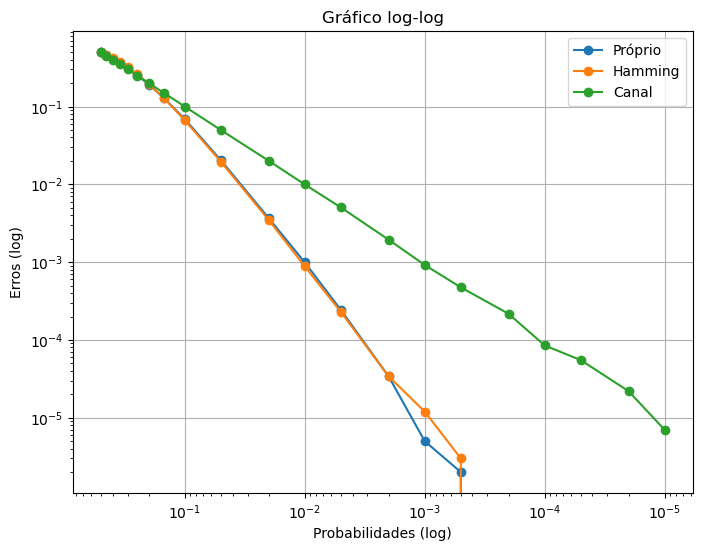

In [32]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(8, 6))

# Plotando os dados
plt.loglog(probs, oerros, marker='o', label='Próprio')
plt.loglog(probs, herros, marker='o', label='Hamming')
plt.loglog(probs, cerros, marker='o', label='Canal')

# Configurando o título e os rótulos dos eixos
plt.title('Gráfico log-log')
plt.xlabel('Probabilidades (log)')
plt.ylabel('Erros (log)')

# Adicionando a legenda
plt.legend()

# Invertendo o eixo x
plt.gca().invert_xaxis()

# Exibindo o gráfico
plt.grid(True)
plt.show()